<a href="https://colab.research.google.com/github/karim-mammadov/CodeAlpha_Tasks/blob/main/Sales_Prediction_using_Python_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Kaggle API key and download **dataset**

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"karimmammadov1","key":"bd3f40fd258b68cf544b437535a12d7d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bumba5341/advertisingcsv

Dataset URL: https://www.kaggle.com/datasets/bumba5341/advertisingcsv
License(s): unknown
advertisingcsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile('/content/advertisingcsv.zip','r') as zip_ref:
    zip_ref.extractall('/content//content/advertisingcsv.data')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
df = pd.read_csv('/content/advertising_dataset/Advertising.csv')
print(df.head())
print(df.info())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [17]:
print(df.isnull().sum())

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [18]:
print(df.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [20]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
df.drop('Unnamed: 0', axis=1, inplace=True)

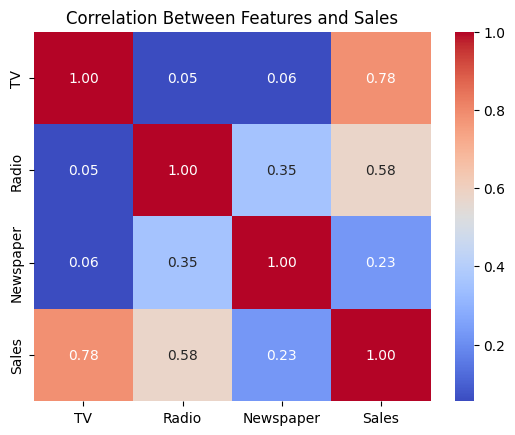

In [22]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features and Sales")
plt.show()

In [23]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Model-1 Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [31]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression → R²: {r2_lr:.2f}, RMSE: {rmse_lr:.2f}")

Linear Regression → R²: 0.90, RMSE: 1.78


In [32]:
# Model-2 Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [33]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest → R²: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}")

Random Forest → R²: 0.98, RMSE: 0.76


In [34]:
# Model 3 – Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [35]:
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(f"Gradient Boosting → R²: {r2_gb:.2f}, RMSE: {rmse_gb:.2f}")

Gradient Boosting → R²: 0.98, RMSE: 0.73


In [36]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'R² Score': [r2_lr, r2_rf, r2_gb],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb]
})
print(results)

               Model  R² Score      RMSE
0  Linear Regression  0.899438  1.781600
1      Random Forest  0.981833  0.757235
2  Gradient Boosting  0.983143  0.729435


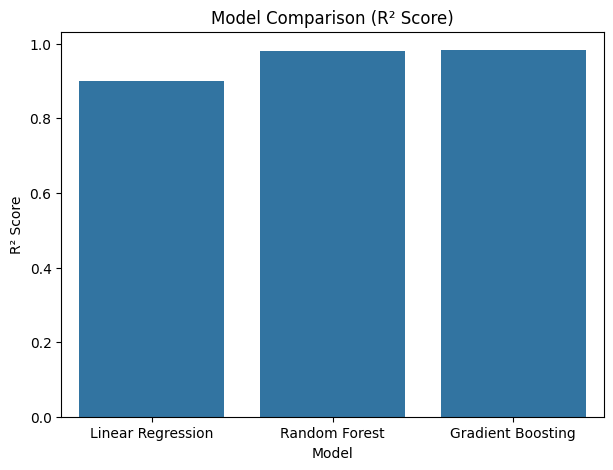

In [37]:
plt.figure(figsize=(7,5))
sns.barplot(x='Model', y='R² Score', data=results)
plt.title("Model Comparison (R² Score)")
plt.show()

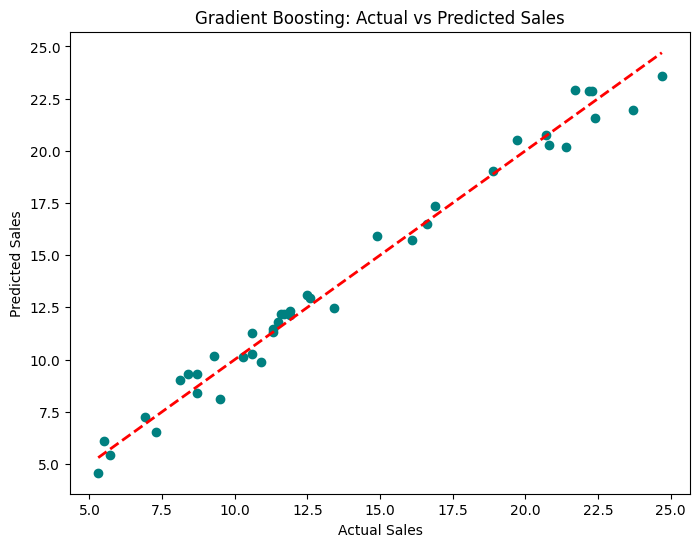

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gb, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ideal xətt
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Gradient Boosting: Actual vs Predicted Sales")
plt.show()

/tmp/ipython-input-2803713469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


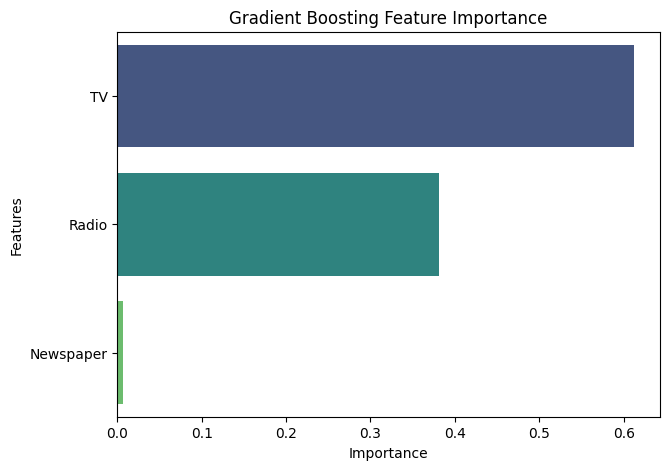

In [39]:
feature_importance = gb.feature_importances_
features = X_train.columns

plt.figure(figsize=(7,5))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()